<a href="https://colab.research.google.com/github/Bahrombekk/pytorch/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22non_linear_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from  sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [27]:
data=pd.read_csv("https://raw.githubusercontent.com/JavohirJalilov/AI-Matplotlib/master/dataset/Yearly%20Population%20Growth%20Rate.csv")

In [28]:
data=np.array(data)
x=data[:,0]/1000
y=data[:,1]
x=torch.tensor(x,dtype=torch.float32).reshape(-1,1)
y=torch.tensor(y,dtype=torch.float32).reshape(-1,1)

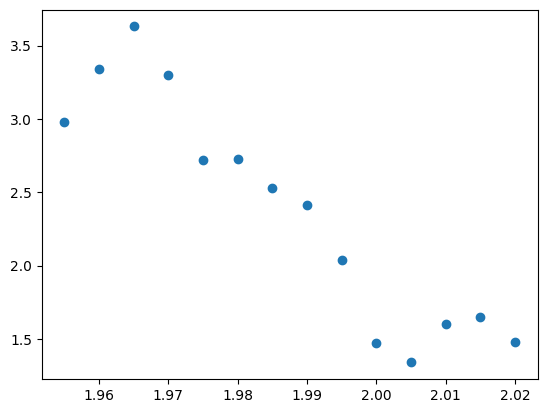

In [29]:
plt.scatter(x,y)

In [30]:
tren_x,test_x,tren_y,test_y=train_test_split(x,y,test_size=(0.3),random_state=True)

In [31]:
class Net(torch.nn.Module):
   def __init__(self, input=1, output=1):
       super().__init__()
       self.linear1 = torch.nn.Linear(in_features=1, out_features=20)
       self.linear2 = torch.nn.Linear(in_features=20, out_features=10)
       self.linear3 = torch.nn.Linear(in_features=10, out_features=1)
       self.activation =torch.nn.Sigmoid()

   def forward(self, x):
       x1 = self.linear1(x)
       x2 = self.linear2(x1)
       x2 = self.activation(x2)
       x3 = self.linear3(x2)

       return x3

In [32]:
net=Net()

In [33]:
criterion = torch.nn.MSELoss()
learningRate=0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learningRate)

In [34]:
epochs=1500
loss_data=[]
for epoch in range(epochs):

    optimizer.zero_grad()

    y_hat = net(tren_x)

    loss = criterion(y_hat, tren_y)
    loss_data.append(loss.item())
    loss.backward()

    optimizer.step()

    if epoch%100==0:
      print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 4.791014671325684
epoch 100, loss 0.4664578437805176
epoch 200, loss 0.4663931429386139
epoch 300, loss 0.4663301706314087
epoch 400, loss 0.46626532077789307
epoch 500, loss 0.4661957025527954
epoch 600, loss 0.4661017954349518
epoch 700, loss 0.46589353680610657
epoch 800, loss 0.4653782248497009
epoch 900, loss 0.4637446999549866
epoch 1000, loss 0.4559137523174286
epoch 1100, loss 0.4005275368690491
epoch 1200, loss 0.2578621804714203
epoch 1300, loss 0.1433272659778595
epoch 1400, loss 0.08008993417024612


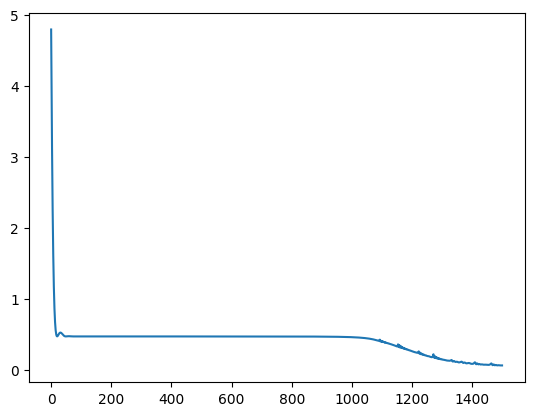

In [35]:
plt.plot(loss_data)

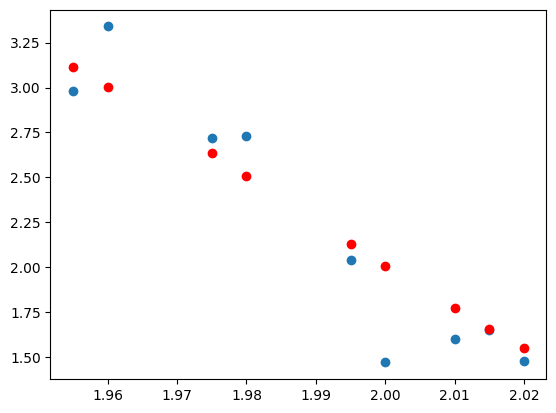

In [36]:
plt.scatter(tren_x,tren_y)
plt.scatter(tren_x,y_hat.detach().numpy(),c="r")

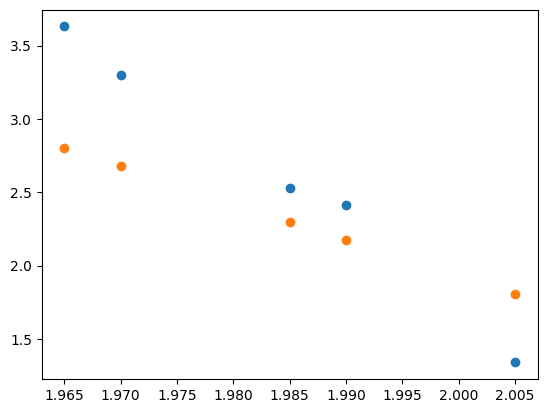

In [37]:
y_hat=net(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_hat.detach().numpy())

In [82]:
x = np.linspace(-10, 10, num=1000)
y = 0.1*x*np.cos(x) + 0.03*np.random.normal(size=1000)

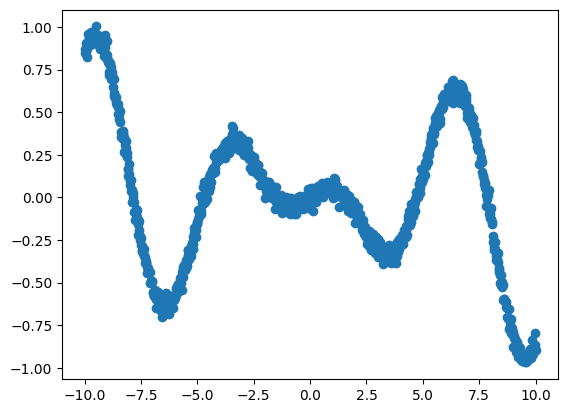

In [83]:
plt.scatter(x,y)

In [84]:
x = torch.tensor(x,dtype=torch.float32).reshape(-1,1)
y = torch.tensor(y,dtype=torch.float32).reshape(-1,1)

In [85]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=(0.3),random_state=True)

In [86]:
class Net(torch.nn.Module):
   def __init__(self, input=1, output=1):
       super().__init__()
       self.linear1 = torch.nn.Linear(in_features=1, out_features=20)
       self.linear2 = torch.nn.Linear(in_features=20, out_features=10)
       self.linear3 = torch.nn.Linear(in_features=10, out_features=1)
       self.activation =torch.nn.Sigmoid()

   def forward(self, x):
       x1 = self.linear1(x)
       x2 = self.linear2(x1)
       x2 = self.activation(x2)
       x3 = self.linear3(x2)

       return x3

In [87]:
net = Net()

In [88]:
criterion = torch.nn.MSELoss()
learningRate=0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learningRate)

In [89]:
epochs=1500
loss_data=[]
for epoch in range(epochs):

    optimizer.zero_grad()

    y_hat = net(train_x)

    loss = criterion(y_hat, train_y)
    loss_data.append(loss.item())
    loss.backward()

    optimizer.step()

    if epoch%100==0:
      print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.8250108957290649
epoch 100, loss 0.1725093573331833
epoch 200, loss 0.1076415553689003
epoch 300, loss 0.020326633006334305
epoch 400, loss 0.005860174540430307
epoch 500, loss 0.0030619860626757145
epoch 600, loss 0.0021884243469685316
epoch 700, loss 0.0018240802455693483
epoch 800, loss 0.0016277367249131203
epoch 900, loss 0.0015426378231495619
epoch 1000, loss 0.0014456200879067183
epoch 1100, loss 0.0014183748280629516
epoch 1200, loss 0.001370902988128364
epoch 1300, loss 0.0013652131892740726
epoch 1400, loss 0.001332068000920117


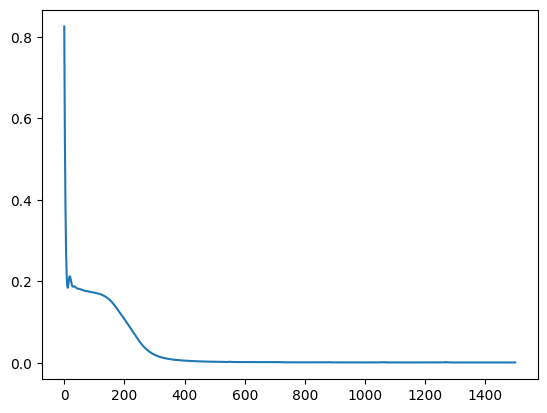

In [90]:
plt.plot(loss_data)

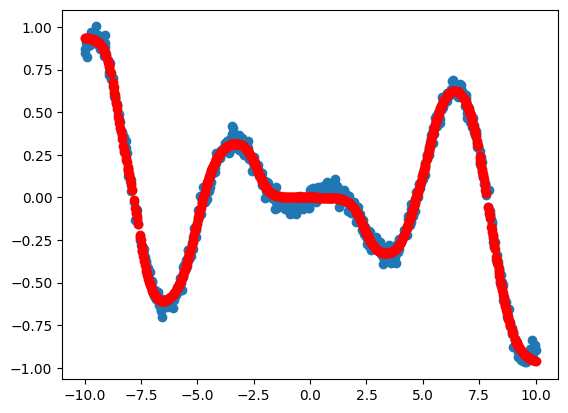

In [91]:
plt.scatter(train_x,train_y)
plt.scatter(train_x,y_hat.detach().numpy(),c="r")

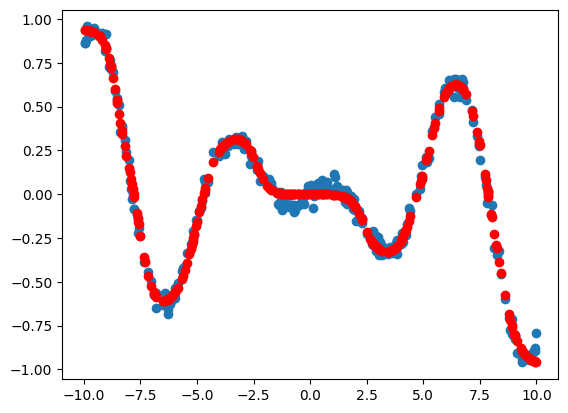

In [92]:
y_hat=net(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_hat.detach().numpy(),c="r")

In [52]:
x = np.linspace(-10, 10, num=1000)
y = 0.1*x*np.sin(x)+np.cos(x) + 0.03*np.random.normal(size=1000)

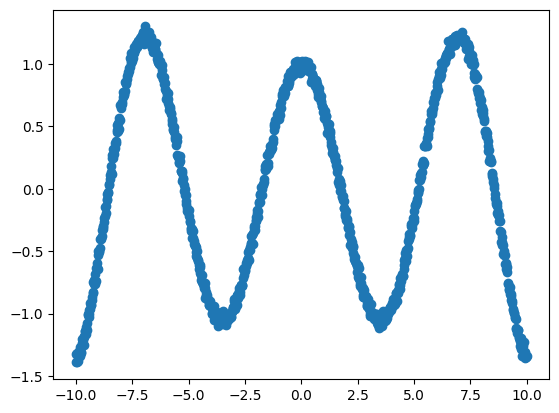

In [54]:
plt.scatter(x,y)

In [67]:
x=torch.tensor(x,dtype=torch.float32).reshape(-1,1)
y=torch.tensor(y,dtype=torch.float32).reshape(-1,1)

<ipython-input-67-d0b5e917287d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x=torch.tensor(x,dtype=torch.float32).reshape(-1,1)
<ipython-input-67-d0b5e917287d>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y,dtype=torch.float32).reshape(-1,1)


In [68]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=(0.3),random_state=True)

In [69]:
class Net(torch.nn.Module):
   def __init__(self, input=1, output=1):
       super().__init__()
       self.linear1 = torch.nn.Linear(in_features=1, out_features=20)
       self.linear2 = torch.nn.Linear(in_features=20, out_features=10)
       self.linear3 = torch.nn.Linear(in_features=10, out_features=1)
       self.activation =torch.nn.Sigmoid()

   def forward(self, x):
       x1 = self.linear1(x)
       x2 = self.linear2(x1)
       x2 = self.activation(x2)
       x3 = self.linear3(x2)

       return x3

In [70]:
net=Net()

In [71]:
criterion = torch.nn.MSELoss()
learningRate=0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learningRate)

In [72]:
epochs=1500
loss_data=[]
for epoch in range(epochs):

    optimizer.zero_grad()

    y_hat = net(train_x)

    loss = criterion(y_hat, train_y)
    loss_data.append(loss.item())
    loss.backward()

    optimizer.step()

    if epoch%100==0:
      print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.6721687912940979
epoch 100, loss 0.3541692793369293
epoch 200, loss 0.03713257983326912
epoch 300, loss 0.011422974988818169
epoch 400, loss 0.006080941297113895
epoch 500, loss 0.004325217567384243
epoch 600, loss 0.00531506072729826
epoch 700, loss 0.0032694945111870766
epoch 800, loss 0.0021880760323256254
epoch 900, loss 0.0018095236737281084
epoch 1000, loss 0.002262537833303213
epoch 1100, loss 0.0016348703065887094
epoch 1200, loss 0.002314323093742132
epoch 1300, loss 0.001394048216752708
epoch 1400, loss 0.0015952839748933911


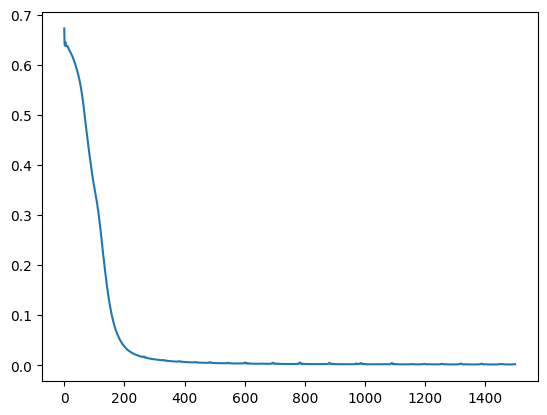

In [73]:
plt.plot(loss_data)

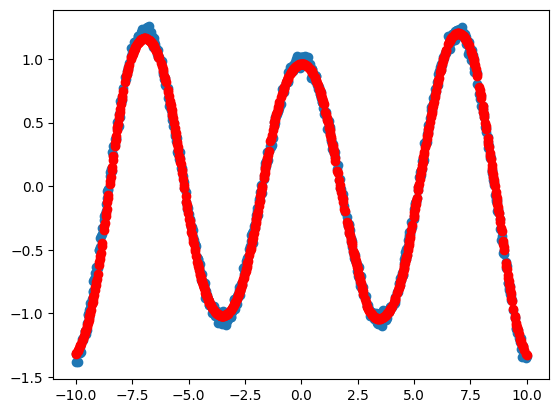

In [76]:
plt.scatter(train_x,train_y)
plt.scatter(train_x,y_hat.detach().numpy(),c="r")

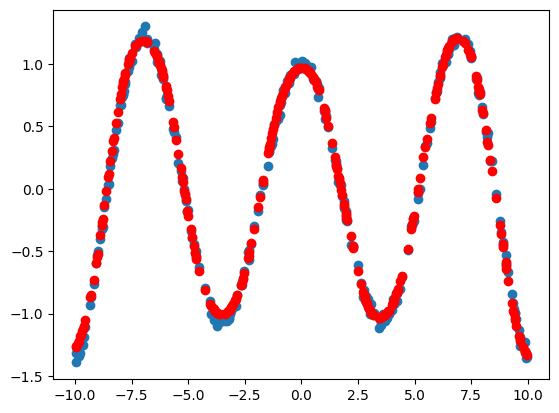

In [80]:

y_hat=net(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_hat.detach().numpy(),c="r")